In [3]:
import gym;
import eplus_env;
import random
import statistics
import matplotlib.pyplot as plt

# Input: inTemps  = (r1,r2) where r1,r2 are a range of room temps (0,30)
#        outTemps = (r3,r4) where r3,r4 are a range of out temps (-17,35)
# Output: a dict with the cartesian product of both in and out temps
#         as a key and 0 as a value.
def getQTable(inTemps,outTemps):
  (r1,r2) = inTemps
  (r3,r4) = outTemps
  qList = []
  for i in range(r1,r2):
    for j in range(r3,r4):
        # Making a dict where the states (i,j) are the keys and the value 
        # is an array where the indices represent the actions (0 => off),
        # (1 => on = 30) respectively and the elements of the array are 
        # the Q-Value for each state and action (key and value).
        qList.append(((i,j),[0,0]))
  qDict = dict(qList)
  return qDict

'''
def getFreqTable(inTemps,outTemps):
  (r1,r2) = inTemps
  (r3,r4) = outTemps
  freqList = []
  for i in range(r1,r2):
    for j in range(r3,r4):
        freqList.append(((i,j),0))
  freqDict = dict(freqList)
  return freqDict
'''

max_energy = 11000
min_energy = 0
max_temp = 24
min_temp = 0


def normalize(x,x_max,x_min):

  if x < x_min:
    x = x_min
  elif x > x_max:
    x = x_max

  return (x_max - x) / (x_max - x_min)

def cubic(x, scale = - 0.1, translation = 0):
  return translation + (x**3) * scale

def getReward(sp,rt,E15):
  a = 0.5
  delta_sp = abs(sp - rt)
  norm_e = normalize(E15,max_energy,min_energy)
  norm_t = normalize(delta_sp,max_temp,min_temp)
  R = a * norm_e + (1-a) * norm_t
  return cubic(8 * R - 4, scale = -0.1, translation = 2)

sp = 30
inTemps = (0,31)
outTemps = (-17,35)
alpha = 0.6
gamma = 0.9
epsilon = 0.6

# making the initial Q-table
qTable = getQTable(inTemps,outTemps)

E15_list = []
temp_list = []

#freqTable = getFreqTable(inTemps,outTemps)
env = gym.make('Eplus-test-v4')

# Number of episodes
for i in range(5):
    energyC_list = []
    Delta_sp_list = []

    # Reset the env (creat the EnergyPlus subprocess)
    curSimTime, ob, isTerminal = env.reset()

    # get the initial in/out temps and the energy consumption
    state = (round(ob[8]),round(ob[0]))
    energyC = ob[14] # ???
    while not isTerminal:
      if random.uniform(0,1) < epsilon:
        choice = random.randint(0,1)
      else:
        # a list of qValues indexed by actions
        actionsList = qTable[state]
        choice = actionsList.index(max(actionsList))

      # (0 = off) (1 = on,30)
      if choice:
        action = [sp,sp]
      else:
        action = [0,0]

      curSimTime, ob, isTerminal = env.step(action)
      nextState = (round(ob[8]),round(ob[0]))

      # get the energy consumption for the last 15 mins
      energyC = abs(energyC - ob[14])
      energyC_list.append(energyC)
      Delta_sp_list.append(abs(ob[8] - sp))
    
      reward = getReward(sp,ob[8],energyC)

      oldQValue = qTable[state][choice]
      nextQMax = max(qTable[nextState])
      # update the Q - Value
      newQValue = oldQValue + alpha * (reward + gamma * nextQMax - oldQValue)
      qTable[state][choice] = newQValue
      # ble ate ice
      #freqTable[state] += 1

      state = nextState
      # ate next ate (زي المفجوع)
    
    E15_list.append(energyC_list)
    temp_list.append(Delta_sp_list)

# Safe termination of the environment after use.
env.end_env()

# u late i u ate


# plot learning rate

[2021-07-27 11:49:54,462] EPLUS_ENV_Eplus-test-v4_MainThread_ROOT INFO:Creating EnergyPlus simulation environment...
[2021-07-27 11:49:54,465] EPLUS_ENV_Eplus-test-v4_MainThread_ROOT INFO:EnergyPlus working directory is in /home/abdalla/Desktop/QSIURP/Simulations/Eplus-env-Eplus-test-v4-res7/Eplus-env-sub_run1
[2021-07-27 11:50:22,972] EPLUS_ENV_Eplus-test-v4_MainThread_ROOT INFO:Last EnergyPlus process has been closed. 
[2021-07-27 11:50:22,974] EPLUS_ENV_Eplus-test-v4_MainThread_ROOT INFO:Creating EnergyPlus simulation environment...
[2021-07-27 11:50:23,004] EPLUS_ENV_Eplus-test-v4_MainThread_ROOT INFO:EnergyPlus working directory is in /home/abdalla/Desktop/QSIURP/Simulations/Eplus-env-Eplus-test-v4-res7/Eplus-env-sub_run2
[2021-07-27 11:50:50,410] EPLUS_ENV_Eplus-test-v4_MainThread_ROOT INFO:Last EnergyPlus process has been closed. 
[2021-07-27 11:50:50,411] EPLUS_ENV_Eplus-test-v4_MainThread_ROOT INFO:Creating EnergyPlus simulation environment...
[2021-07-27 11:50:50,413] EPLUS_E

In [9]:
for i in range(len(E15_list)):
    E15_list[i] = sum(E15_list[i])
    temp_list[i] = sum(temp_list[i])

TypeError: 'float' object is not iterable

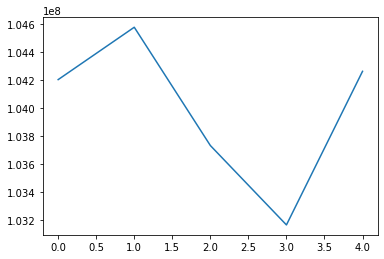

In [5]:
plt.plot(E15_list)

11.444771455442035


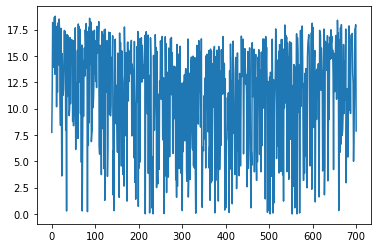

In [15]:
plt.plot(Delta_sp_list[::50])
print (sum(Delta_sp_list) / len(Delta_sp_list))

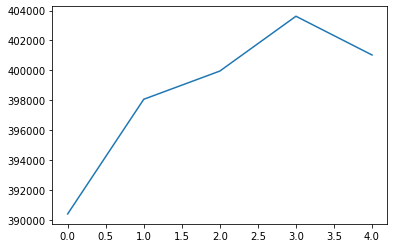

In [7]:
plt.plot(temp_list)

In [8]:
env = gym.make('Eplus-test-v4');
curSimTime, ob, isTerminal = env.reset(); # Reset the env (creat the EnergyPlus subprocess)
E15 = ob[14]
delta_sp = 0
while not isTerminal:
    state = (round(ob[8]),round(ob[0]))
    actionsList = qTable[state]
    choice = actionsList.index(max(actionsList))
    
    # (0 = off) (1 = on,30)
    if choice:
        action = [sp,sp]
    else:
        action = [0,0]
    
    curSimTime, ob, isTerminal = env.step(action);
    E15 += abs(E15 - ob[14])
    delta_sp += abs(sp - ob[8])
env.end_env(); # Safe termination of the environment after use.

[2021-07-27 11:52:13,600] EPLUS_ENV_Eplus-test-v4_MainThread_ROOT INFO:Creating EnergyPlus simulation environment...
[2021-07-27 11:52:13,600] EPLUS_ENV_Eplus-test-v4_MainThread_ROOT INFO:Creating EnergyPlus simulation environment...
[2021-07-27 11:52:13,603] EPLUS_ENV_Eplus-test-v4_MainThread_ROOT INFO:EnergyPlus working directory is in /home/abdalla/Desktop/QSIURP/Simulations/Eplus-env-Eplus-test-v4-res8/Eplus-env-sub_run1
[2021-07-27 11:52:13,603] EPLUS_ENV_Eplus-test-v4_MainThread_ROOT INFO:EnergyPlus working directory is in /home/abdalla/Desktop/QSIURP/Simulations/Eplus-env-Eplus-test-v4-res8/Eplus-env-sub_run1


In [23]:
print("E15 stuff:")
print(E15)
print("delta_sp stuff:")
print(delta_sp)


E15 stuff:
inf
delta_sp stuff:
497707.319759789
